# Day 08. Exercise 04
# Regression

## 0. Imports

In [357]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import inspect

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [358]:
df = pd.read_csv('../data/checker_regression.csv').fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uid          77 non-null     object 
 1   num_commits  77 non-null     int64  
 2   pageviews    77 non-null     float64
 3   AVG(diff)    77 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ KB


In [359]:
X = df.drop(['uid','AVG(diff)'],axis = 1).values
y = df['AVG(diff)'].values



In [360]:
X_train, x_test, Y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=21)


## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [361]:

def crossval(n_splits, X,y, model_class):
    kf = KFold(n_splits=n_splits,shuffle=True, random_state=21)
    test_rmse_scores = []
    for train_index, test_index in kf.split(X):
        X_train,X_test = X[train_index], X[test_index]
        y_train,y_test = y[train_index], y[test_index]
    
        if 'random_state' in inspect.signature(model_class).parameters:
            model = model_class(random_state=21)
        else:
            model = model_class()
        
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))
        test_rmse_scores.append(test_rmse)

        print(f"train - {train_rmse:.4f}   |   test - {test_rmse:.4f}")

    print(f"Average RMSE on crossval is {np.mean(test_rmse_scores):.4f}")

In [362]:
crossval(n_splits=10, X=X, y=y, model_class=(LinearRegression))

train - 42.2729   |   test - 70.4398
train - 47.4573   |   test - 30.6574
train - 47.7785   |   test - 27.1373
train - 46.2442   |   test - 44.1231
train - 46.3936   |   test - 42.4204
train - 47.7154   |   test - 28.2734
train - 46.3089   |   test - 45.6731
train - 47.8119   |   test - 20.5725
train - 44.1292   |   test - 63.1496
train - 42.3509   |   test - 74.1589
Average RMSE on crossval is 44.6605


In [363]:
crossval(n_splits=10, X=X, y=y, model_class=(DecisionTreeRegressor))

train - 0.0000   |   test - 71.8849
train - 0.0000   |   test - 25.2437
train - 0.0000   |   test - 0.0000
train - 0.0000   |   test - 20.2940
train - 0.0000   |   test - 72.2051
train - 0.0000   |   test - 28.9914
train - 0.0000   |   test - 7.0364
train - 0.0000   |   test - 8.1262
train - 0.0000   |   test - 86.6365
train - 0.0000   |   test - 65.9305
Average RMSE on crossval is 38.6349


In [364]:
crossval(n_splits=10, X=X, y=y, model_class=(RandomForestRegressor))

train - 12.7777   |   test - 55.2188
train - 14.9447   |   test - 14.1370
train - 15.1454   |   test - 0.0000
train - 14.7818   |   test - 26.9259


train - 12.9984   |   test - 52.7040
train - 15.1621   |   test - 32.3805
train - 16.3949   |   test - 14.5337
train - 14.9880   |   test - 22.2065
train - 14.0953   |   test - 69.4567
train - 15.0027   |   test - 42.5626
Average RMSE on crossval is 33.0126


The best one for me is RandomForestRegressor

## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

In [365]:
lr_model = LinearRegression()
lr_model.fit(X_train,Y_train)
lr_pred = lr_model.predict(x_test)

In [366]:
def plot_actual_vs_predicted(y_true, y_pred, model_name):
    plt.figure(figsize=(6,6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')  # ideal line
    plt.xlabel('Actual AVG(diff)')
    plt.ylabel('Predicted AVG(diff)')
    plt.title(f'Actual vs Predicted: {model_name}')
    plt.grid(True)
    # plt.ylim(-50,0)
    plt.show()

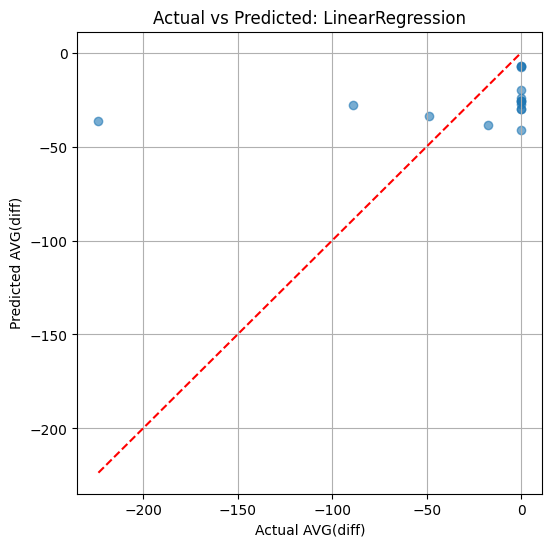

Linear Regression - RMSE: 54.11312189353347


In [367]:
plot_actual_vs_predicted(y_test,lr_pred,"LinearRegression")
rmse_lr = np.sqrt(mean_squared_error(y_test, lr_pred))
print(f"Linear Regression - RMSE: {rmse_lr}")

In [368]:
dt_model = DecisionTreeRegressor(max_depth=4, random_state=21)
dt_model.fit(X_train, Y_train)
dt_pred = dt_model.predict(x_test)



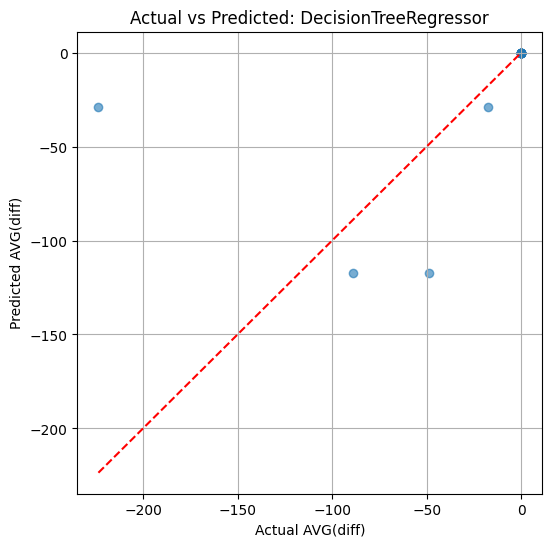

Decision Tree Regressor - RMSE: 52.20544984056315


In [369]:
plot_actual_vs_predicted(y_test,dt_pred,"DecisionTreeRegressor")
rmse_lr = np.sqrt(mean_squared_error(y_test, dt_pred))
print(f"Decision Tree Regressor - RMSE: {rmse_lr}")

In [370]:
rf_model = RandomForestRegressor(n_estimators=100,max_depth=25, random_state=21)
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(x_test)

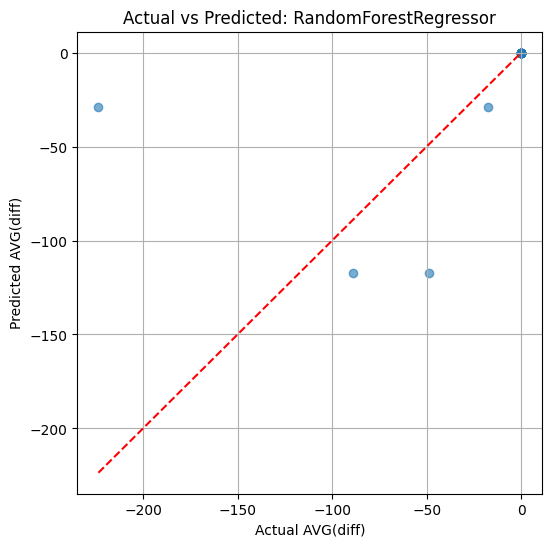

Random Forest - RMSE: 40.64644517182163


In [371]:
plot_actual_vs_predicted(y_test,dt_pred,"RandomForestRegressor")
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_pred))
print(f"Random Forest - RMSE: {rmse_rf}")